## Importing Libraries

In [26]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import pandas as pd

## Data Preperation

In [4]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train.max()

255

In [7]:
X_train = X_train/255

In [8]:
X_test = X_test/255

## One Hot Encoding Labels

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Neural Network

In [10]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [14]:
model.fit(X_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 25s 498us/step - loss: 1.5561 - acc: 0.4392
Epoch 2/10
50000/50000 [==============================] - 25s 496us/step - loss: 1.1982 - acc: 0.5791
Epoch 3/10
50000/50000 [==============================] - 27s 531us/step - loss: 1.0470 - acc: 0.6341
Epoch 4/10
50000/50000 [==============================] - 25s 510us/step - loss: 0.9463 - acc: 0.6734
Epoch 5/10
50000/50000 [==============================] - 25s 504us/step - loss: 0.8630 - acc: 0.7024
Epoch 6/10
50000/50000 [==============================] - 24s 476us/step - loss: 0.8031 - acc: 0.7268
Epoch 7/10
50000/50000 [==============================] - 25s 495us/step - loss: 0.7591 - acc: 0.7423
Epoch 8/10
50000/50000 [==============================] - 24s 484us/step - loss: 0.7194 - acc: 0.7559
Epoch 9/10
50000/50000 [==============================] - 24s 488us/step - loss: 0.6918 - acc: 0.7673
Epoch 10/10
50000/50000 [==============================] - 24s 482us/step - loss: 

In [15]:
model.metrics_names

['loss', 'acc']

In [16]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 2s 169us/step


[1.1487384828567504, 0.6727]

## Prediction

In [17]:
predictions = model.predict_classes(X_test)

In [18]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.71      0.73      1000
          1       0.90      0.69      0.78      1000
          2       0.67      0.48      0.56      1000
          3       0.51      0.47      0.49      1000
          4       0.53      0.73      0.61      1000
          5       0.57      0.62      0.60      1000
          6       0.93      0.56      0.70      1000
          7       0.63      0.80      0.70      1000
          8       0.77      0.83      0.80      1000
          9       0.69      0.83      0.75      1000

avg / total       0.69      0.67      0.67     10000



## Evaluation

In [30]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [31]:
arr = confusion_matrix(y_test,predictions)

Text(87,0.5,'label (ground truth)')

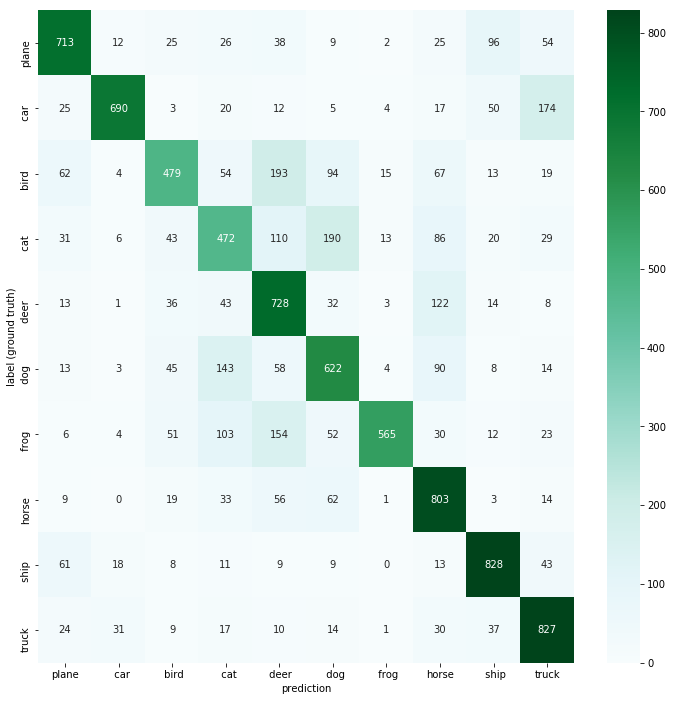

In [34]:
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize=(12,12))
sns.heatmap(df_cm,annot=True,cmap='BuGn',fmt="d")
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")